# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is actualized.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\
\text{Posterior} && p(\theta|x,n) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):`

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data:
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

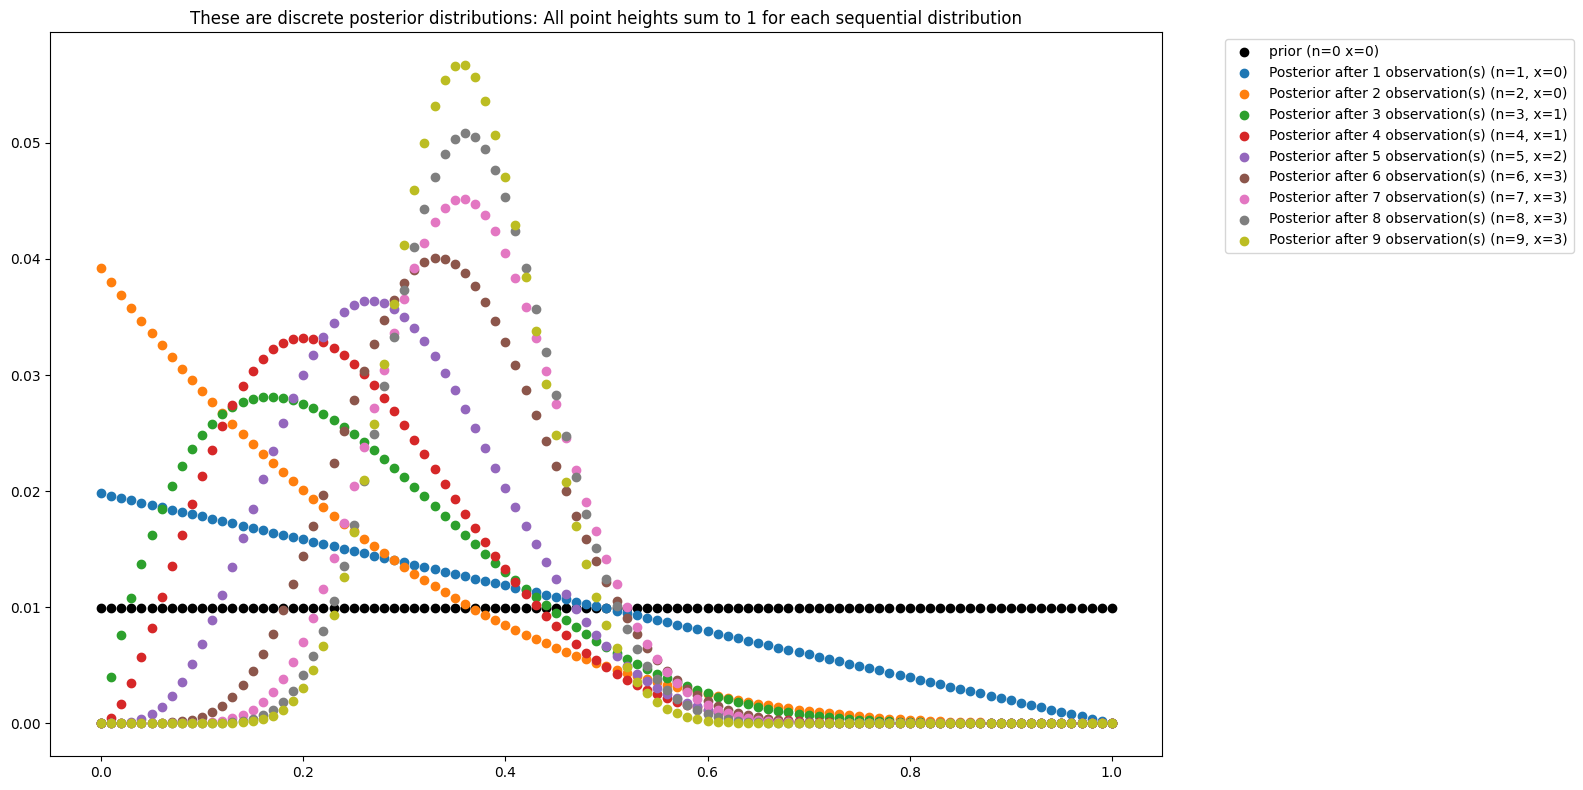

In [ ]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101)
prior = np.ones(101)/101

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")


for idx, observation in enumerate(observations, 1):
    # Update counts
    n += 1
    x += observation

    # Compute the likelihood for each theta
    likelihood = theta = parameter_domain
    likelihood = theta**x * (1 - theta)**(n - x)

    # Handle cases where theta=0 or theta=1 to avoid 0^0
    likelihood = np.nan_to_num(likelihood)

    # Compute the unnormalized posterior
    unnormalized_posterior = likelihood * prior

    # Normalize the posterior
    posterior = unnormalized_posterior / unnormalized_posterior.sum()

    # Plot the posterior
    plt.scatter(parameter_domain, posterior, label=f"Posterior after {idx} observation(s) (n={n}, x={x})")

    # Update the prior for the next iteration
    prior = posterior



plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Bayesian/Sequential Learning

A prior is updated to a posterior which becomes the new prior for the next data

\begin{array}{llll}
1.&&\!\!\!\!\!\!&\!\!\!\!\!\!p(\theta | x_1) \propto {} f(x_1|\theta)p(\theta) \\
2.&&\!\!\!\!\!\! p(\theta | x_1, x_2) \propto f(x_2|\theta)&\!\!\!\!\!\!p(\theta | x_1) \\
3.&p(\theta | x_1, x_2, x_3) \propto{} f(x_3|\theta) & \!\!\!\!\!\! p(\theta | x_1, x_2)  \\
\vdots\\
\end{array}

### But this is the same as a single batch update

$$p(\theta | x_1, x_2, x_3) \propto f(x_1,x_2,x_3|\theta)p(\theta)
\overset{(x_i \perp\!\!\perp x_j | \theta)}{=} \underbrace{f(x_1|\theta)f(x_2|\theta)f(x_3|\theta)p(\theta)}_{\left[ \prod_{i=1}^{3}f(x_i|\theta)\right]p(\theta)} $$

## Conditional Independence

\begin{align*}
\text{Conditional Independence} && p(x_2|\theta) &={} p(x_2|x_1,\theta) \; \text{ or } \; (x_2 \perp\!\!\!\perp x_1 | \theta)
\end{align*}

\begin{align*}
p(\theta|x_2,x_1) &\propto{} p(x_2, x_1, \theta)\\
& = {} \underbrace{p(x_2| \theta, x_1)} p(x_1 | \theta) p(\theta)
\color{gray}{\longleftarrow \text{chain rule}}\\
& \quad (x_2 \perp\!\!\!\perp x_1 | \theta)\\
& = {} \overbrace{\;\;p(x_2| \theta)\;\;} \underbrace{p(x_1 | \theta) p(\theta)}_{\propto \; p(\theta|x_1)}\\
&\propto{}  p(x_2| \theta) \underbrace{p(\theta | x_1)}_{\text{new prior}} \longleftarrow \text{previous posterior}
\end{align*}

A prior is updated to a posterior which becomes the new prior for the next data

## Q2

1. This is a beta distribution, specifically $\text{Beta}\bigl(\alpha_j + x_j^{(t)}, \;\beta_j + n_j^{(t)} - x_j^{(t)}\bigr)$


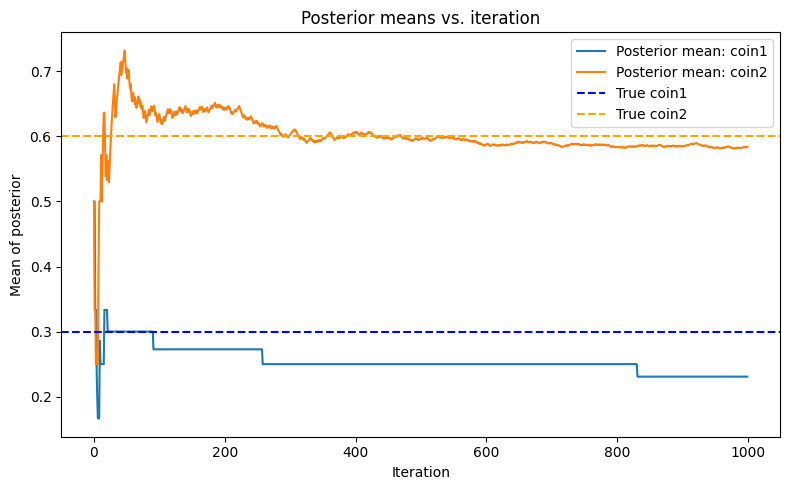

In [ ]:
#Q2:
# 2.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def theta1_less_theta2(alpha1, beta1, alpha2, beta2, mc_samples=5000):
    """
    Computes P(Theta1 < Theta2) when
    Theta1 ~ Beta(alpha1, beta1) and Theta2 ~ Beta(alpha2, beta2).
    """
    samples1 = np.random.beta(alpha1, beta1, size=mc_samples)
    samples2 = np.random.beta(alpha2, beta2, size=mc_samples)
    return np.mean(samples1 < samples2)

theta_true1 = 0.30
theta_true2 = 0.60

n1, x1 = 0, 0
n2, x2 = 0, 0

# Prior hyperparameters for Beta (assume Beta(1,1) = Uniform as a simple prior)
alpha_prior_1, beta_prior_1 = 1.0, 1.0
alpha_prior_2, beta_prior_2 = 1.0, 1.0

# Number of iterations
m = 1000

# Store data for plotting
choices = []
posterior_means_1 = []
posterior_means_2 = []
prob_choose_coin2 = []

for t in range(m):

    # Current posterior parameters for coin 1
    alpha1_post = alpha_prior_1 + x1
    beta1_post  = beta_prior_1 + (n1 - x1)

    # Current posterior parameters for coin 2
    alpha2_post = alpha_prior_2 + x2
    beta2_post  = beta_prior_2 + (n2 - x2)

    # Probability that Theta1 < Theta2 under current posteriors
    pr_1_lt_2 = theta1_less_theta2(alpha1_post, beta1_post,
                                           alpha2_post, beta2_post)

    # Decide which coin to flip: coin2 with probability pr_1_lt_2, else coin1
    flip_coin_2 = (np.random.rand() < pr_1_lt_2)

    # Flip coin
    if flip_coin_2:
        success = (np.random.rand() < theta_true2)
        n2 += 1
        x2 += int(success)
        choices.append(2)
    else:
        success = (np.random.rand() < theta_true1)
        n1 += 1
        x1 += int(success)
        choices.append(1)

    # Track posterior means (for plotting / diagnostics)
    pm1 = alpha1_post / (alpha1_post + beta1_post)
    pm2 = alpha2_post / (alpha2_post + beta2_post)
    posterior_means_1.append(pm1)
    posterior_means_2.append(pm2)
    prob_choose_coin2.append(pr_1_lt_2)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(posterior_means_1, label='Posterior mean: coin1')
ax.plot(posterior_means_2, label='Posterior mean: coin2')
ax.axhline(theta_true1, color='blue', linestyle='--', label='True coin1')
ax.axhline(theta_true2, color='orange', linestyle='--', label='True coin2')
ax.set_title("Posterior means vs. iteration")
ax.set_xlabel("Iteration")
ax.set_ylabel("Mean of posterior")
ax.legend()

plt.tight_layout()
plt.show()


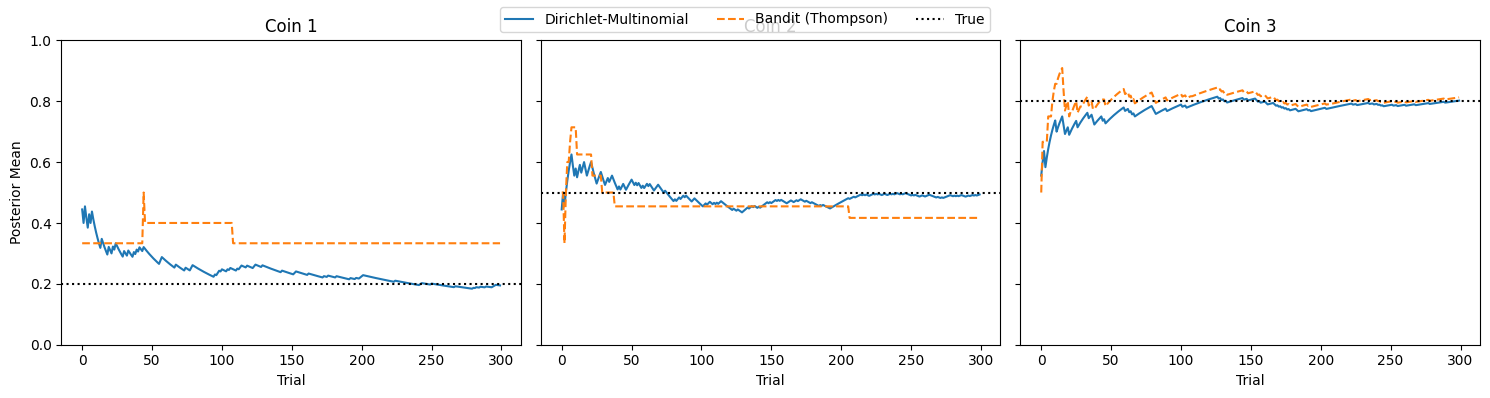

=== Dirichlet-Multinomial (full 3-coin data) ===
Final posterior means: [0.19480519 0.49350649 0.80194805]
=== Bandit Thompson Sampling (1 coin/flip) ===
Final posterior means: [0.33333333 0.41666667 0.8125    ]

Number of times each coin was chosen in the bandit approach:
  Coin 1: chosen 4 times
  Coin 2: chosen 10 times
  Coin 3: chosen 286 times


In [ ]:
#Q3:

import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1) SIMULATE ALL DATA UP FRONT
# ----------------------------

np.random.seed(42)

# True success probabilities for each of the 3 coins
theta_true = np.array([0.2, 0.5, 0.8])

# Number of total "trials"
# In this scenario, each "trial" yields 3 binary outcomes
T = 300

# data[t,:] will hold outcomes of flipping all 3 coins at trial t
data = (np.random.rand(T, 3) < theta_true).astype(int)

# ----------------------------
# 2) ANALYSIS A: DIRICHLET-MULTINOMIAL
#    (Observes ALL coin outcomes on every trial)
# ----------------------------
# We have 2^3 = 8 possible patterns for 3 binary coins.
# We'll maintain a Dirichlet prior over these 8 categories.

def pattern_to_index(p):
    """
    Convert a length-3 binary vector p (e.g. [1,0,1])
    into an integer 0..7 as bits: (b1 << 2) + (b2 << 1) + b3.
    """
    return (p[0] << 2) + (p[1] << 1) + p[2]

# Uniform Dirichlet(1,1,...,1) over 8 categories
alpha_dirichlet = np.ones(8)
pattern_counts = np.zeros(8, dtype=int)

posterior_means_dm = []  # store [mean_theta1, mean_theta2, mean_theta3] at each t

for t in range(T):
    # Observe all three coin outcomes
    outcome = data[t]
    idx = pattern_to_index(outcome)
    pattern_counts[idx] += 1

    # Posterior is Dirichlet(alpha_dirichlet + pattern_counts)
    post = alpha_dirichlet + pattern_counts
    post_sum = post.sum()

    # Posterior mean for each of the 8 patterns
    posterior_mean_pattern = post / post_sum

    # Compute marginal success probability for each coin
    coin_marginals = np.zeros(3)
    for pattern_idx in range(8):
        # Convert pattern_idx back to 3 bits
        b1 = (pattern_idx >> 2) & 1
        b2 = (pattern_idx >> 1) & 1
        b3 = (pattern_idx >> 0) & 1

        if b1 == 1:
            coin_marginals[0] += posterior_mean_pattern[pattern_idx]
        if b2 == 1:
            coin_marginals[1] += posterior_mean_pattern[pattern_idx]
        if b3 == 1:
            coin_marginals[2] += posterior_mean_pattern[pattern_idx]

    posterior_means_dm.append(coin_marginals)

posterior_means_dm = np.array(posterior_means_dm)  # shape (T, 3)

# ----------------------------
# 3) ANALYSIS B: BANDIT (THOMPSON SAMPLING)
#    (Only flips/updates *one* coin each trial)
# ----------------------------
# Each coin j has a Beta(alpha_j, beta_j) prior
alpha = np.ones(3)
beta  = np.ones(3)

posterior_means_bandit = []  # store [mean_theta1, mean_theta2, mean_theta3] at each t
choices = []

for t in range(T):
    # Sample from each coin's posterior
    samples = np.array([np.random.beta(alpha[j], beta[j]) for j in range(3)])
    # Pick the coin with the highest sampled value
    chosen_arm = np.argmax(samples)
    choices.append(chosen_arm)

    # We "pretend" we only flip the chosen coin for this trial
    # The outcome is data[t, chosen_arm]
    success = data[t, chosen_arm]

    # Update the Beta posterior for that coin
    alpha[chosen_arm] += success
    beta[chosen_arm]  += (1 - success)

    # Record the posterior means of all 3 coins
    pm = alpha / (alpha + beta)
    posterior_means_bandit.append(pm.copy())

posterior_means_bandit = np.array(posterior_means_bandit)  # shape (T, 3)

# ----------------------------
# 4) PLOT COMPARISON
# ----------------------------

fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

for j in range(3):
    axs[j].plot(posterior_means_dm[:, j], label="Dirichlet-Multinomial")
    axs[j].plot(posterior_means_bandit[:, j], label="Bandit (Thompson)", linestyle='--')
    axs[j].axhline(theta_true[j], color='k', linestyle=':', label="True" if j == 0 else None)
    axs[j].set_title(f"Coin {j+1}")
    axs[j].set_xlabel("Trial")
    axs[j].set_ylim(0, 1)

axs[0].set_ylabel("Posterior Mean")
handles, labels_ = axs[0].get_legend_handles_labels()
fig.legend(handles, labels_, loc="upper center", ncol=3)
plt.tight_layout()
plt.show()

# Optional: Print final stats
print("=== Dirichlet-Multinomial (full 3-coin data) ===")
print("Final posterior means:", posterior_means_dm[-1])
print("=== Bandit Thompson Sampling (1 coin/flip) ===")
print("Final posterior means:", posterior_means_bandit[-1])
print("\nNumber of times each coin was chosen in the bandit approach:")
for j in range(3):
    print(f"  Coin {j+1}: chosen {np.sum(np.array(choices)==j)} times")


Discuss which of the two approaches you think is most appropriate and describe an actual real world AB testing context where you could deploy this Bayesian multi-armed bandit to effectively balancing the exploration-exploitation tradeoff in that setting:

I think that the plots above demostrate the efficiency of the Bandit method. The bandit method used only 1/3 the number of samples that the Multinomal approach used to achieve the same outcome (Coin 3 is the best). So with limited users you focus your efforts on the best performing features, while ignoring (exposing to fewer users) crappy features.

In a real life setting to run the Multinomial experiment you would have to split your users into three groups, thus condemming 2/3rds of your users to a suboptimal product until the experiment ends. Whereas the Bandit approach automatically fazes out suboptimal features, and promotes the best performing feature. Allowing you to find the best thing faster while simultaneously rolling it out.